In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#Reading the file
a1 = pd.read_csv(r"C:\Users\ROHAN\Videos\finlatics\DsResearch\Banking\banking_data.csv")

In [3]:
#Setting the options
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('future.no_silent_downcasting', True) #For the .replace() downcasting in correlation code chunk

In [4]:
#Examining the data 1
print(a1.head(5))
print(a1.shape)

   age           job  marital marital_status  education default  balance  \
0   58    management  married        married   tertiary      no     2143   
1   44    technician   single         single  secondary      no       29   
2   33  entrepreneur  married        married  secondary      no        2   
3   47   blue-collar  married        married    unknown      no     1506   
4   33       unknown   single         single    unknown      no        1   

  housing loan  contact  day month day_month  duration  campaign  pdays  \
0     yes   no  unknown    5   may     5-May       261         1     -1   
1     yes   no  unknown    5   may     5-May       151         1     -1   
2     yes  yes  unknown    5   may     5-May        76         1     -1   
3     yes   no  unknown    5   may     5-May        92         1     -1   
4      no   no  unknown    5   may     5-May       198         1     -1   

   previous poutcome   y  
0         0  unknown  no  
1         0  unknown  no  
2         0

In [5]:
#Checking for missing values
a1.isnull().sum()

age               0
job               0
marital           3
marital_status    3
education         3
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [6]:
#Examining data 2
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

In [7]:
#Data cleaning and sorting
#Checking if marital and marital_status are same
print(a1["marital"].value_counts())
print(a1["marital_status"].value_counts())
#These two seem to be representing same data

marital
married     27216
single      12790
divorced     5207
Name: count, dtype: int64
marital_status
married     27216
single      12790
divorced     5207
Name: count, dtype: int64


In [4]:
#Removing marital column. We create another dataframe a2, preserving the original a1
a2 = a1.drop(columns = ["marital", "day_month"], inplace = False)

In [132]:
#Check if the column marital has been removed
a2.columns
a2.shape

(45216, 17)

In [5]:
#Changing the name of following columns for better understanding of the data they represent:
#a) default to cred_default; b) y to y_subscription
a2.rename(columns = {"default": "cred_default", "y": "y_subscription"}, inplace = True)
#Check for the column names now
a2.columns

Index(['age', 'job', 'marital_status', 'education', 'cred_default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y_subscription'],
      dtype='object')

In [6]:
#Dropping na rows from marital_status and education as there are only 3 such values
a2.dropna(subset = ["marital_status", "education"], inplace = True)

In [12]:
#Checking for missing values
a2.isnull().sum()
#Missing values removed

age               0
job               0
marital_status    0
education         0
cred_default      0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y_subscription    0
dtype: int64

In [35]:
#Check for unique values
print(a2.nunique())

age                 77
job                 12
marital_status       3
education            4
cred_default         2
balance           7168
housing              2
loan                 2
contact              3
day                 31
month               12
day_month          318
duration          1573
campaign            48
pdays              559
previous            41
poutcome             4
y_subscription       2
dtype: int64


In [13]:
#Checking unique value counts
a2["age"].value_counts(sort = True)
#Age 32 has the highest frequency, 2084, hence data is unimodal

age
32    2084
31    1996
33    1972
34    1930
35    1894
36    1806
30    1756
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1186
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     892
57     827
54     811
55     806
26     805
56     778
59     770
58     740
60     596
25     527
24     302
23     202
61     147
22     129
62      80
21      79
63      77
64      74
70      67
66      63
65      59
71      55
67      54
72      52
20      49
73      45
77      44
69      44
75      38
68      37
74      37
19      34
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
86       9
84       9
85       5
87       4
89       3
92       2
93       2
90       2
95       2
88       2
94       1
Name: count, dtype: int64

In [14]:
#Let us look at key statistical info about the variable, age
print(a2["age"].describe())

count    45210.000000
mean        40.938465
std         10.619311
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


In [15]:
#skewness and kurtosis
#Skewness
sa1 = a2["age"].skew()
print(f"Skew is {sa1}")
#Data is moderately right skewed

#Kurtosis
ka1 = a2["age"].kurt()
print(f"Kurtosis is {ka1}")
#Leptokurtic

Skew is 0.6851629522827681
Kurtosis is 0.31940875424129533


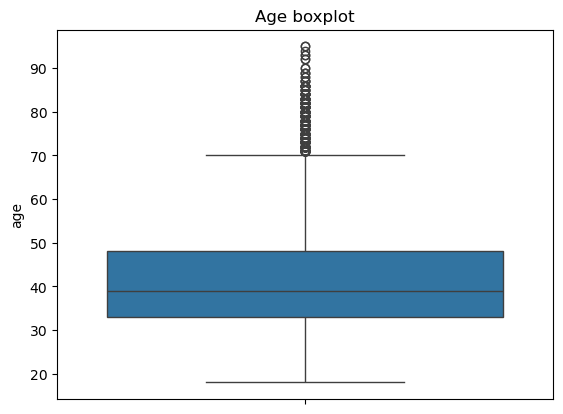

In [16]:
#Plot a boxplot to get a visual idea of the age variable along with outliers, if any
sns.boxplot(y = "age", data = a2)
plt.title("Age boxplot")
plt.show()

In [12]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [18]:
outliers1 = find_outliers_IQR(a2["age"])
print("number of outliers: "+ str(len(outliers1)))
print("max outlier value: "+ str(outliers1.max()))
print("min outlier value: "+ str(outliers1.min()))

number of outliers: 488
max outlier value: 95
min outlier value: 71


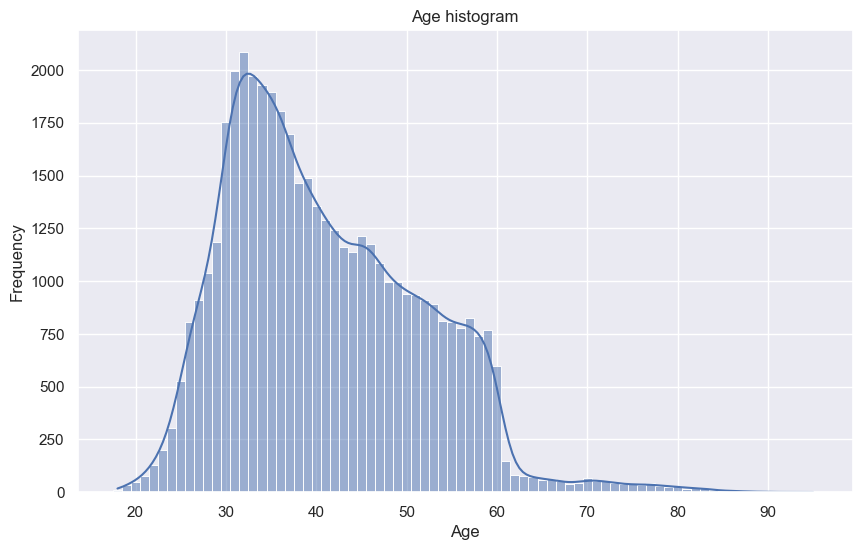

In [38]:
#Plot a histogram of the age variable
plt.figure(figsize=(10, 6))
sns.histplot(data=a2, x="age", discrete = True, kde = True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age histogram")
plt.show()

In [20]:
#Q2: -	How does the job type vary among the clients?
#Creating a frequency table
job1 = a2["job"].value_counts()
print(job1)

job
blue-collar      9731
management       9458
technician       7597
admin.           5171
services         4154
retired          2266
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           936
unknown           288
Name: count, dtype: int64


In [21]:
#Examining the job column further
print(a2["job"].describe())

count           45210
unique             12
top       blue-collar
freq             9731
Name: job, dtype: object


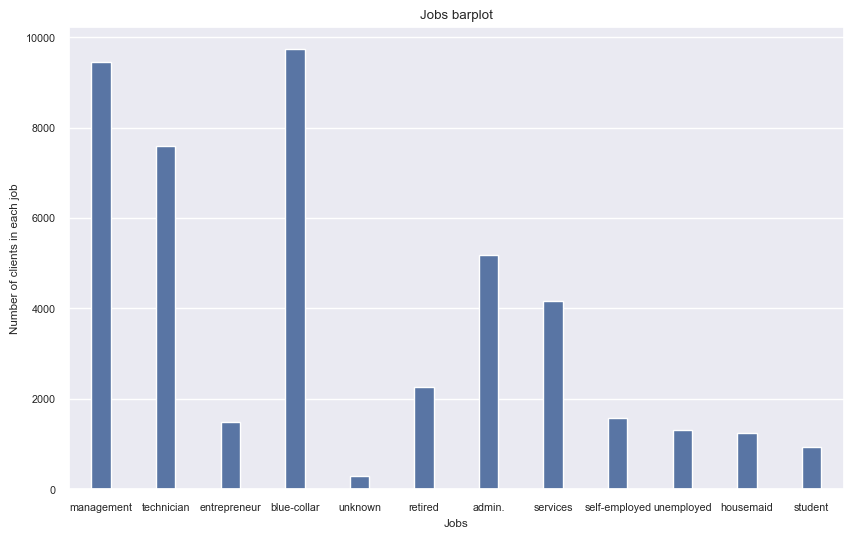

In [159]:
#Making a countplot for each of the jobs
plt.figure(figsize=(10, 6))
sns.countplot(x = "job", data = a2, width = 0.3)
sns.set(font_scale = 0.80)
plt.xlabel("Jobs")
plt.ylabel("Number of clients in each job")
plt.title("Jobs barplot")
plt.show()

In [23]:
#Q3. -	What is the marital status distribution of the clients?
#Creating a frequency table
marriedornot1 = a2["marital_status"].value_counts()
print(marriedornot1)

marital_status
married     27216
single      12787
divorced     5207
Name: count, dtype: int64


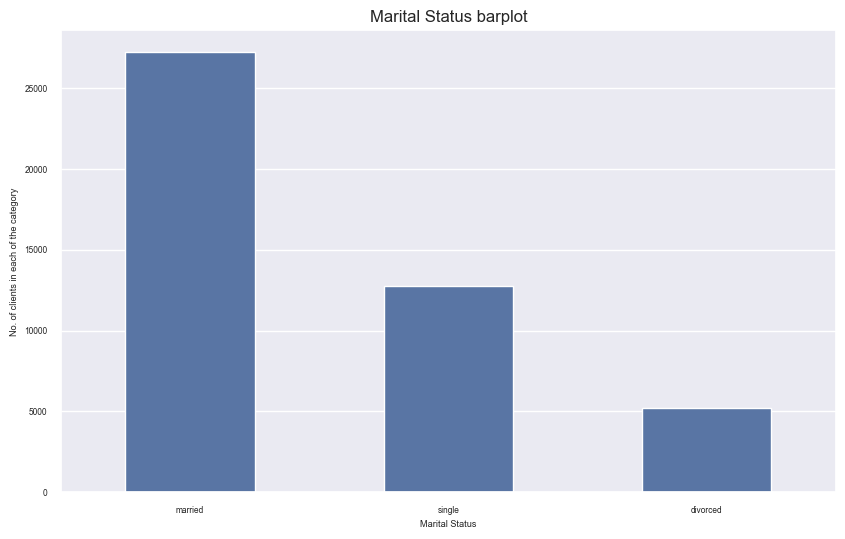

In [24]:
#Making a countplot for marital_status
plt.figure(figsize=(10, 6))
sns.countplot(x = "marital_status", data = a2, width = 0.5)
sns.set(font_scale = 1)
plt.xlabel("Marital Status")
plt.ylabel("No. of clients in each of the category")
plt.title("Marital Status barplot")
plt.show()

In [25]:
#Q4. -	What is the level of education among the clients?
#Creating a frequency table
educationlevel1 = a2["education"].value_counts()
print(educationlevel1)

education
secondary    23201
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


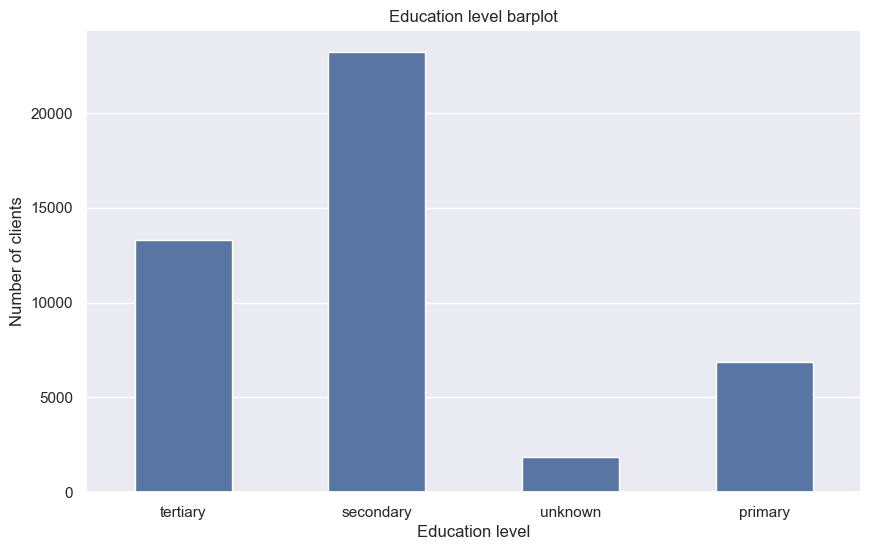

In [26]:
#Making a countplot for education level
plt.figure(figsize=(10, 6))
sns.countplot(x = "education", data = a2, width = 0.5)
sns.set(font_scale = 1)
plt.xlabel("Education level")
plt.ylabel("Number of clients")
plt.title("Education level barplot")
plt.show()

In [27]:
#Q5. -	What proportion of clients have credit in default?
#Creating a frequency table
creddefault1 = a2["cred_default"].value_counts()
print(creddefault1)

cred_default
no     44395
yes      815
Name: count, dtype: int64


In [28]:
#Proportion of clients that have credit in default
cd1 = 815/(44395+815)
print(cd1)

0.018026985180269853


In [10]:
#Q6. -	What is the distribution of average yearly balance among the clients?
#Let us look at key statistical info about the variable, average yearly balance given in euros
print(a2["balance"].describe())

count     45210.000000
mean       1362.333024
std        3044.781647
min       -8019.000000
25%          72.000000
50%         448.500000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


In [22]:
#skewness and kurtosis
#Skewness
ayb1 = a2["balance"].skew()
print(f"Skew is {ayb1}")
#Data is highly right skewed

#Kurtosis
kayb1 = a2["balance"].kurt()
print(f"Kurtosis is {kayb1}")
#Leptokurtic and data has heavy outliers

Skew is 8.360303292801134
Kurtosis is 140.75106614486674


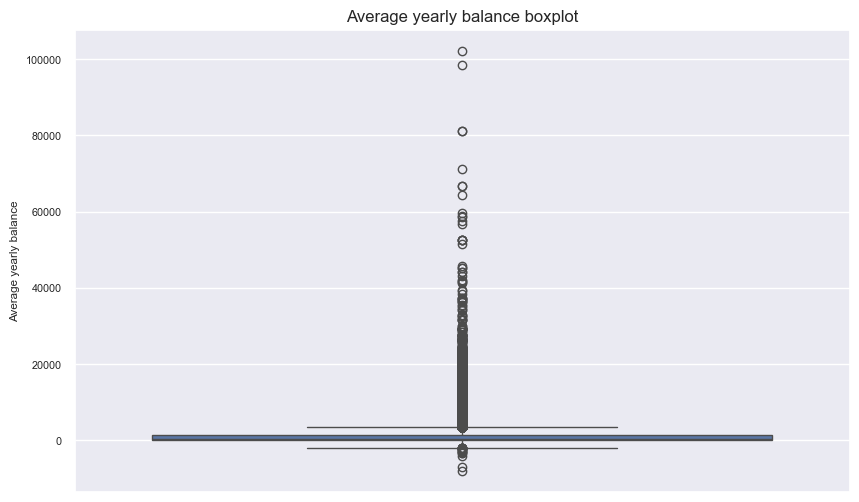

In [46]:
plt.figure(figsize = (10, 6))
sns.boxplot(y = "balance", data = a2)
sns.set(font_scale = 1)
plt.ylabel("Average yearly balance")
plt.title("Average yearly balance boxplot")
plt.show()

In [13]:
#Using the function "find_outliers" created earlier
outliers2 = find_outliers_IQR(a2["balance"])
print("number of outliers: "+ str(len(outliers2)))
print("max outlier value: "+ str(outliers2.max()))
print("min outlier value: "+ str(outliers2.min()))

number of outliers: 4729
max outlier value: 102127
min outlier value: -8019


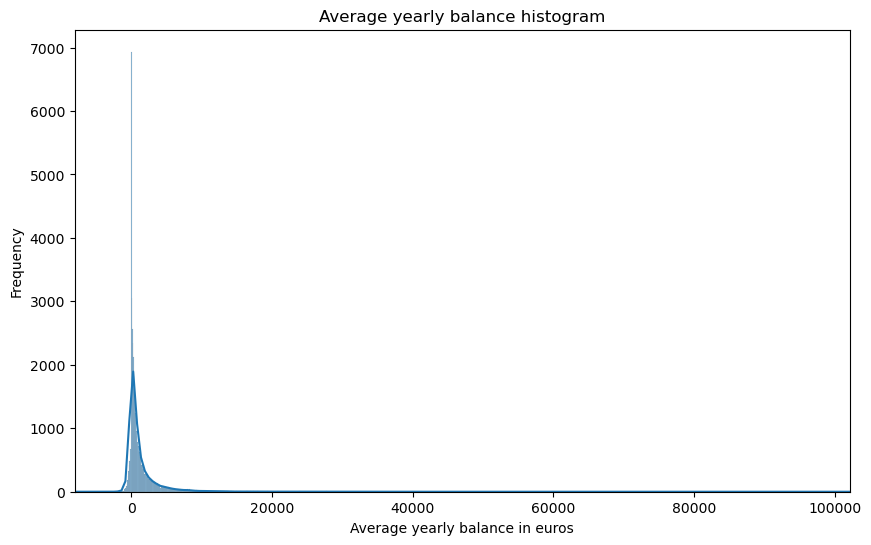

In [20]:
#Plot a histogram of the average yearly balance variable
plt.figure(figsize = (10, 6))
sns.histplot(data=a2, x="balance", kde = True)
plt.xlim(-8019, 102127)
plt.xlabel("Average yearly balance in euros")
plt.ylabel("Frequency")
plt.title("Average yearly balance histogram")
plt.show()

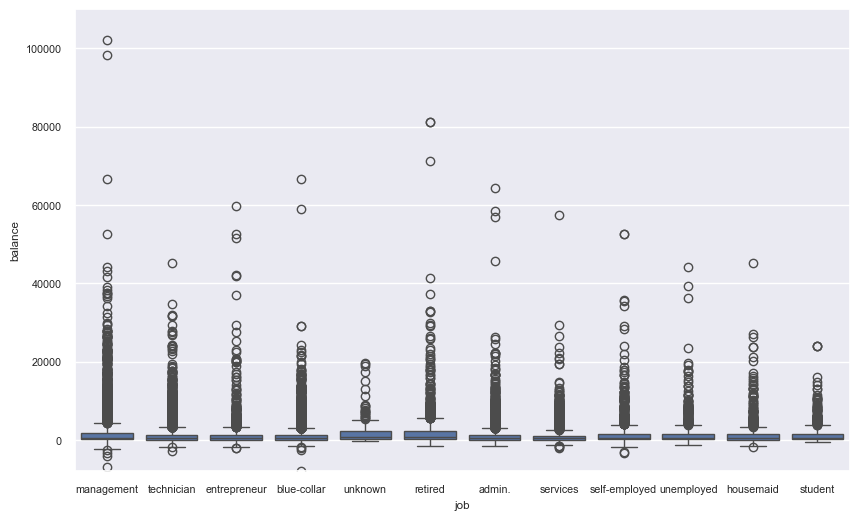

In [45]:
#Plotting jobs vs balance
plt.figure(figsize = (10, 6))
sns.boxplot(data = a2, x = "job", y = "balance")
sns.set(font_scale = 0.70)
plt.ylim(-8019, 110000)
plt.show()

In [47]:
#Q7 - How many clients have housing loans?
#Count the yes and nos
hl1 = a2["housing"].value_counts()
print(hl1)

housing
yes    25130
no     20080
Name: count, dtype: int64


In [49]:
#Q8 -	How many clients have personal loans?
#Count the yes and nos
pl1 = a2["loan"].value_counts()
print(pl1)

loan
no     37966
yes     7244
Name: count, dtype: int64


In [51]:
#Q9 -	What are the communication types used for contacting clients during the campaign?
tc1 = a2["contact"].value_counts()
print(tc1)

contact
cellular     29288
unknown      13020
telephone     2902
Name: count, dtype: int64


In [52]:
#Q10 -	What is the distribution of the last contact day of the month?
#Let us look at key statistical info about the variable, "day" which is the last contact day
print(a2["day"].describe())

count    45210.000000
mean        15.806923
std          8.322310
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64


In [57]:
#Find the day of month which has been oft repeated as last contact day
print(a2["day"].mode())

0    20
Name: day, dtype: int64


In [58]:
#skewness and kurtosis
#Skewness
lcd1 = a2["day"].skew()
print(f"Skew is {lcd1}")
#Data seems symmetrical

#Kurtosis
klcd1 = a2["day"].kurt()
print(f"Kurtosis is {klcd1}")
#platykurtic

Skew is 0.09294568613352638
Kurtosis is -1.0597660371727178


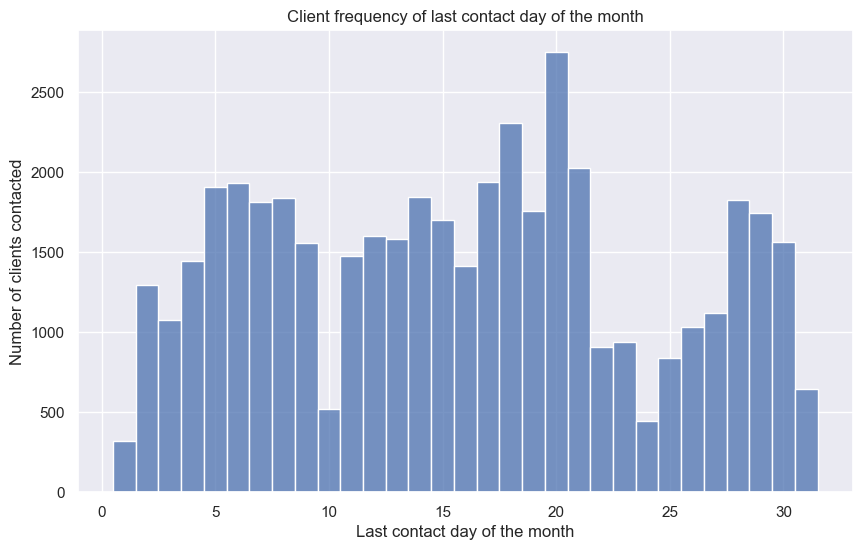

In [62]:
plt.figure(figsize = (10, 6))
sns.histplot(data = a2, x = "day", discrete = True)
plt.xlabel("Last contact day of the month")
plt.ylabel("Number of clients contacted")
plt.title("Client frequency of last contact day of the month")
plt.show()

In [63]:
#Q11 -	How does the last contact month vary among the clients?
lcm1 = a2["month"].value_counts()
print(lcm1)

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3972
apr     2932
feb     2649
jan     1403
oct      735
sep      579
mar      477
dec      214
Name: count, dtype: int64


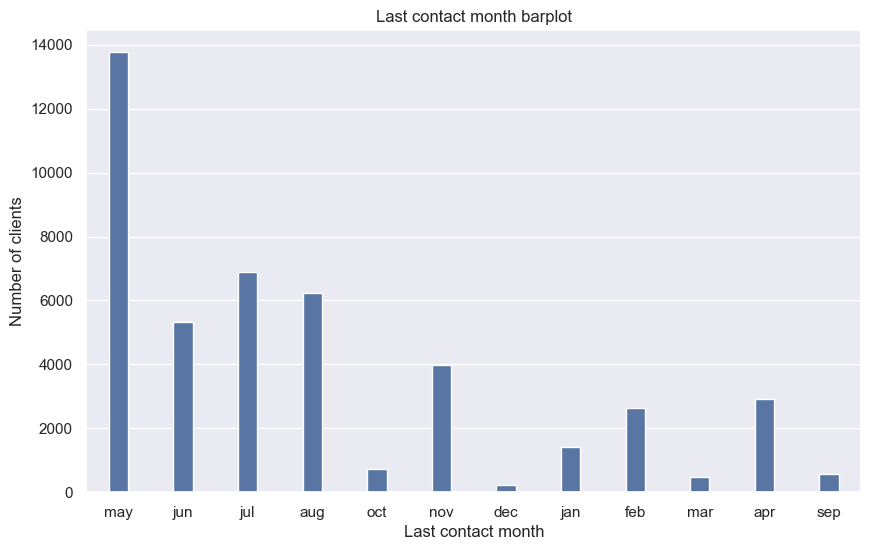

In [64]:
#Making a countplot for last contact month
plt.figure(figsize=(10, 6))
sns.countplot(x = "month", data = a2, width = 0.3)
sns.set(font_scale = 1)
plt.xlabel("Last contact month")
plt.ylabel("Number of clients")
plt.title("Last contact month barplot")
plt.show()

In [65]:
#Q12 -	What is the distribution of the duration of the last contact?
#Let us look at key statistical info about the variable, "duration"
print(a2["duration"].describe())

count    45210.000000
mean       258.155342
std        257.522333
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


In [66]:
#skewness and kurtosis
#Skewness
sd1 = a2["duration"].skew()
print(f"Skew is {sd1}")
#Data is highly right skewed

#Kurtosis
kd1 = a2["duration"].kurt()
print(f"Kurtosis is {kd1}")
#Leptokurtic

Skew is 3.1446100880377292
Kurtosis is 18.156458272401586


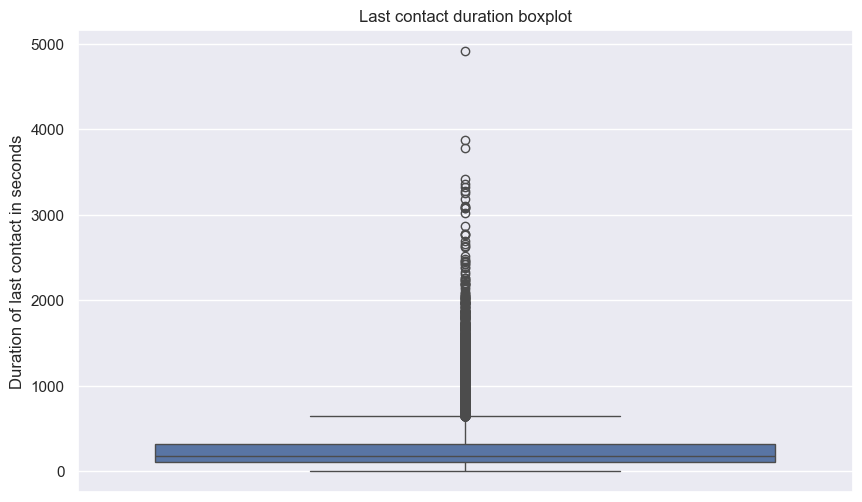

In [67]:
#Boxplot
plt.figure(figsize = (10, 6))
sns.boxplot(y = "duration", data = a2)
sns.set(font_scale = 1)
plt.ylabel("Duration of last contact in seconds")
plt.title("Last contact duration boxplot")
plt.show()

In [68]:
#Using the function "find_outliers" created earlier
outliers3 = find_outliers_IQR(a2["duration"])
print("number of outliers: "+ str(len(outliers3)))
print("max outlier value: "+ str(outliers3.max()))
print("min outlier value: "+ str(outliers3.min()))

number of outliers: 3235
max outlier value: 4918
min outlier value: 644


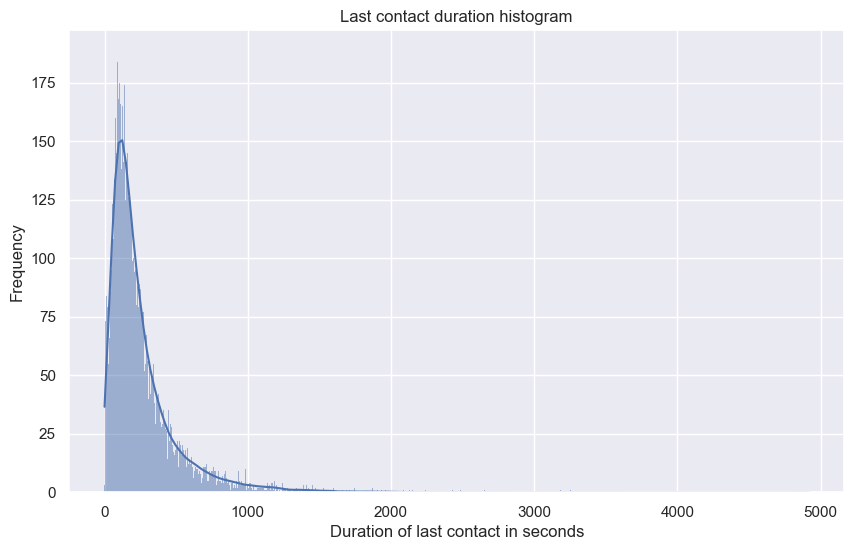

In [69]:
#Plot a histogram of the average yearly balance variable
plt.figure(figsize = (10, 6))
sns.histplot(data=a2, x="duration", discrete = True, kde = True)
plt.xlabel("Duration of last contact in seconds")
plt.ylabel("Frequency")
plt.title("Last contact duration histogram")
plt.show()

In [70]:
#Q13. -	How many contacts were performed during the campaign for each client?
#Let us look at key statistical info about the variable, "campaign"
print(a2["campaign"].describe())

count    45210.000000
mean         2.763791
std          3.098059
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


In [71]:
#skewness and kurtosis
#Skewness
sc1 = a2["campaign"].skew()
print(f"Skew is {sc1}")

#Kurtosis
kc1 = a2["campaign"].kurt()
print(f"Kurtosis is {kc1}")

Skew is 4.898621811090655
Kurtosis is 39.24883630600755


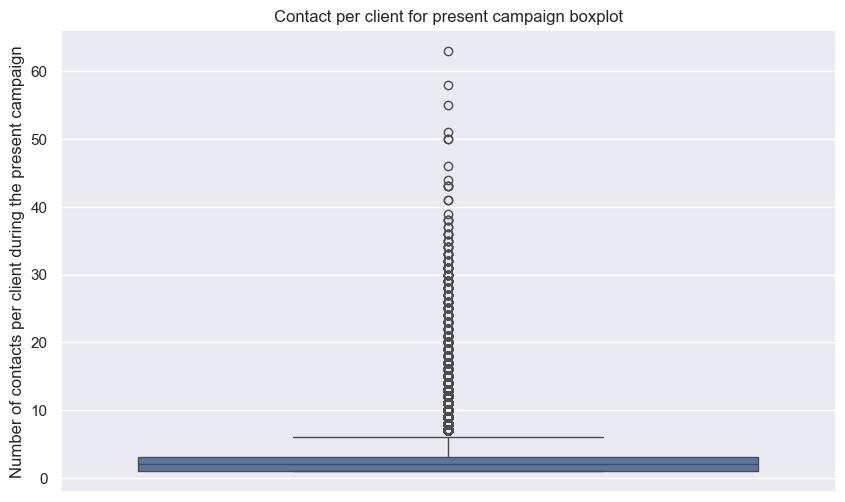

In [72]:
#Boxplot to visualise outliers
plt.figure(figsize = (10, 6))
sns.boxplot(y = "campaign", data = a2)
sns.set(font_scale = 1)
plt.ylabel("Number of contacts per client during the present campaign")
plt.title("Contact per client for present campaign boxplot")
plt.show()


In [73]:
#Using the function "find_outliers" created earlier
outliers4 = find_outliers_IQR(a2["campaign"])
print("number of outliers: "+ str(len(outliers4)))
print("max outlier value: "+ str(outliers4.max()))
print("min outlier value: "+ str(outliers4.min()))

number of outliers: 3064
max outlier value: 63
min outlier value: 7


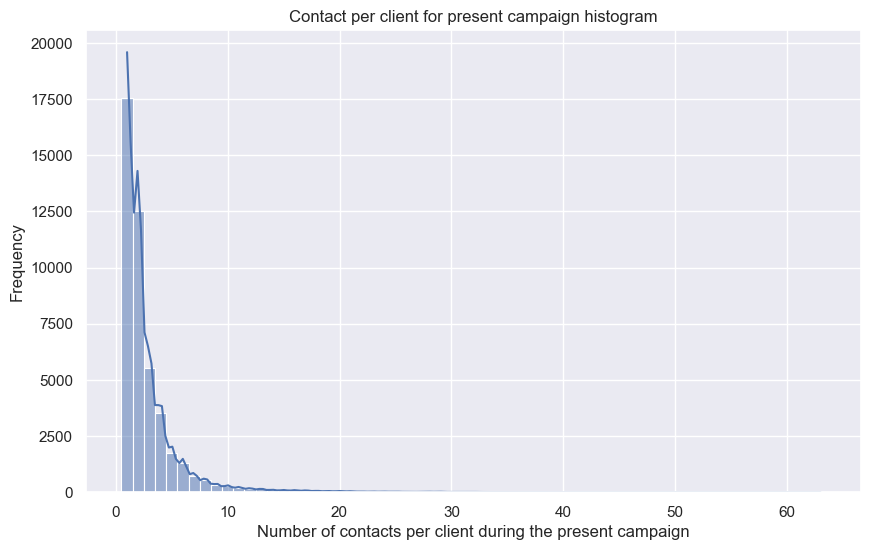

In [75]:
#Plot a histogram of the campaign variable
plt.figure(figsize = (10, 6))
sns.histplot(data=a2, x="campaign", discrete = True, kde = True)
plt.xlabel("Number of contacts per client during the present campaign")
plt.ylabel("Frequency")
plt.title("Contact per client for present campaign histogram")
plt.show()


In [76]:
#Q14. -	What is the distribution of the no. of days passed since the client was last contacted from a previous campaign?
#LEt's first look at the unique values for the number of days
print(a2["pdays"].value_counts())
#81.73% of the total clients were never contacted previously. Does this mean these are all new clients?

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
 181      116
 370       99
 184       86
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 186       60
 189       60
 174       57
 349       57
 96        57
 363       55
 90        54
 97        54
 196       51
 365       51
 368       49
 357       49
 98        49
 342       49
 345       48
 351       48
 178       47
 347       47
 367       47
 190       46
 180       45
 195       45
 356       45
 99        45
 104       45
 344       44
 187       44
 371       44
 172       44
 150       43
 87        43
 170       43
 169       42
 179       42
 176       42
 105       42
 167       42
 355       40
 352       40
 360       38
 168       37
 272       37
 2         37
 336       36
 359       36
 102       35
 358       35
 265       35
 346       35
 171       34
 173       34
 113       33
 330       33
 361       33


In [77]:
#Let us look at key statistical info about the variable, "pdays"
print(a2["pdays"].describe())
#With all data, we consider median because of outliers and that shows a value of -1, i.e. not contacted

count    45210.000000
mean        40.187879
std        100.112791
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [82]:
#Remove all the rows where pdays == -1 to see what the central measure of days is for people who were contacted
a3 = a2[a2.pdays != -1] 

In [84]:
print(a3["pdays"].describe())
#When contacted, the number of days since last contact avg is 224.54 with high variability; median is 194 days

count    8256.000000
mean      224.545543
std       115.339156
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64


In [85]:
#skewness and kurtosis for a2 dataset with -1 included
#Skewness
spd1 = a2["pdays"].skew()
print(f"Skew is {spd1}")

#Kurtosis
kpd1 = a2["pdays"].kurt()
print(f"Kurtosis is {kpd1}")

Skew is 2.6160138300319917
Kurtosis is 6.937676351654671


In [86]:
#skewness and kurtosis for a3 dataset with -1 not included
#Skewness
spd2 = a3["pdays"].skew()
print(f"Skew is {spd2}")

#Kurtosis
kpd2 = a3["pdays"].kurt()
print(f"Kurtosis is {kpd2}")

Skew is 0.6930802349307504
Kurtosis is 1.5302019007481849


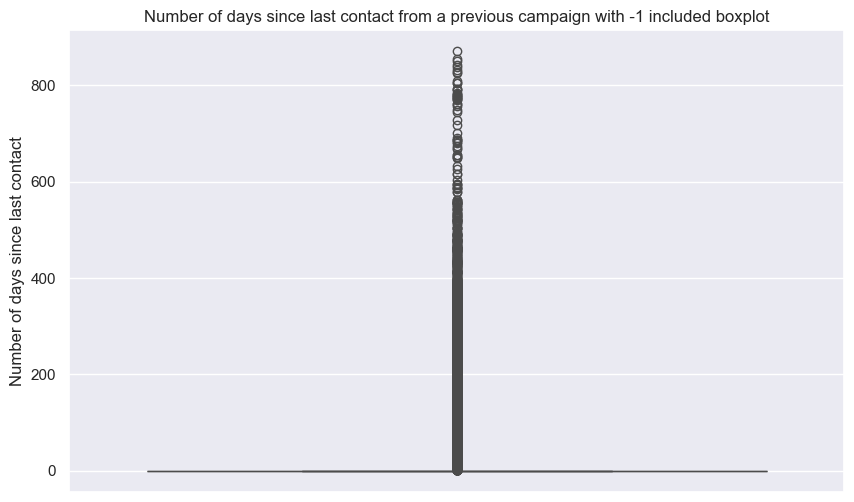

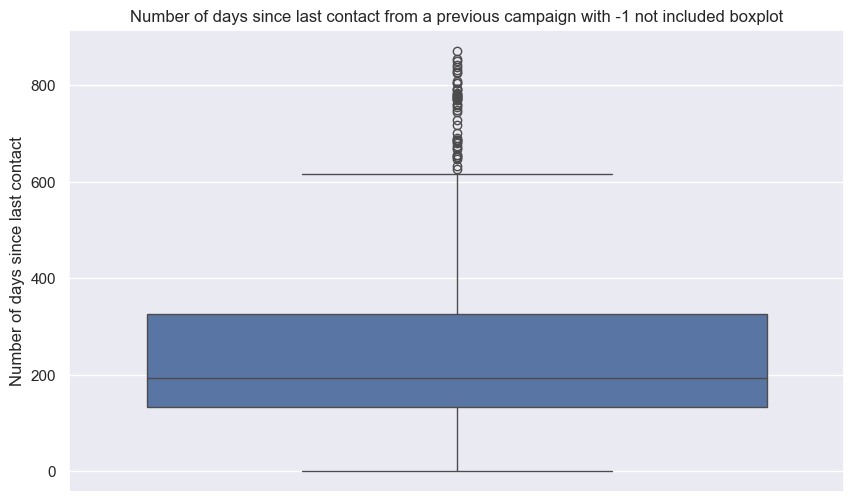

In [90]:
#Boxplot to visualise outliers
plt.figure(figsize = (10, 6))
sns.boxplot(y = "pdays", data = a2)
sns.set(font_scale = 1)
plt.ylabel("Number of days since last contact")
plt.title("Number of days since last contact from a previous campaign with -1 included boxplot")
plt.show()

#a3 dataset
plt.figure(figsize = (10, 6))
sns.boxplot(y = "pdays", data = a3)
sns.set(font_scale = 1)
plt.ylabel("Number of days since last contact")
plt.title("Number of days since last contact from a previous campaign with -1 not included boxplot")
plt.show()

In [89]:
#Using the function "find_outliers" created earlier
outliers5 = find_outliers_IQR(a2["pdays"])
print("number of outliers for a2, -1 included dataset: "+ str(len(outliers5)))
print("max outlier value for a2 dataset: "+ str(outliers5.max()))
print("min outlier value for a2 dataset: "+ str(outliers5.min()))

#a3 dataset
outliers6 = find_outliers_IQR(a3["pdays"])
print("number of outliers for a3, -1 not included dataset: "+ str(len(outliers6)))
print("max outlier value for a3 dataset: "+ str(outliers6.max()))
print("min outlier value for a3 dataset: "+ str(outliers6.min()))

number of outliers for a2, -1 included dataset: 8256
max outlier value for a2 dataset: 871
min outlier value for a2 dataset: 1
number of outliers for a3, -1 not included dataset: 49
max outlier value for a3 dataset: 871
min outlier value for a3 dataset: 626


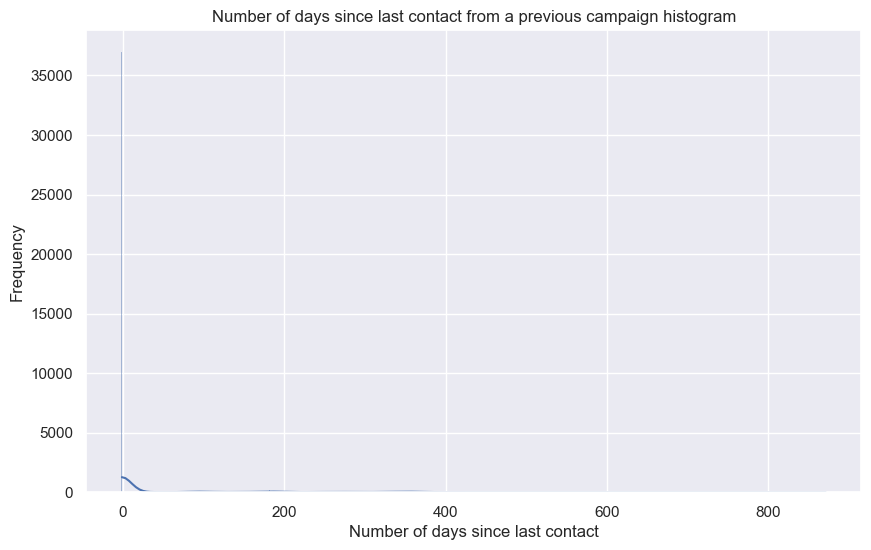

In [87]:
#Plot a histogram of the pdays variable
plt.figure(figsize = (10, 6))
sns.histplot(data=a2, x="pdays", discrete = True, kde = True)
plt.xlabel("Number of days since last contact")
plt.ylabel("Frequency")
plt.title("Number of days since last contact from a previous campaign with -1 included histogram")
plt.show()

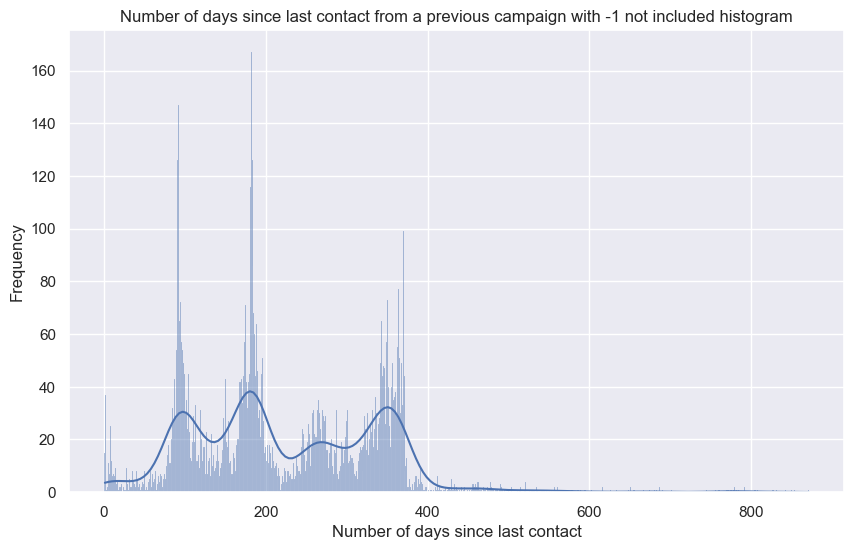

In [88]:
#Plot a histogram of the pdays variable
plt.figure(figsize = (10, 6))
sns.histplot(data=a3, x="pdays", discrete = True, kde = True)
plt.xlabel("Number of days since last contact")
plt.ylabel("Frequency")
plt.title("Number of days since last contact from a previous campaign with -1 not included histogram")
plt.show()

In [92]:
#Q15 -	How many contacts were performed before the current campaign for each client?
#Unique counts
print(a2["previous"].value_counts())
#Indeed, 81.73% seem to be new clients.

previous
0      36954
1       2772
2       2103
3       1142
4        714
5        459
6        278
7        205
8        130
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64


In [91]:
#Let us look at key statistical info about the variable, "previous"
print(a2["previous"].describe())

count    45210.000000
mean         0.580513
std          2.303843
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


In [93]:
#skewness and kurtosis
#Skewness
sprev1 = a2["previous"].skew()
print(f"Skew is {sprev1}")

#Kurtosis
kprev1 = a2["previous"].kurt()
print(f"Kurtosis is {kprev1}")

Skew is 41.826255415844784
Kurtosis is 4503.804626850412


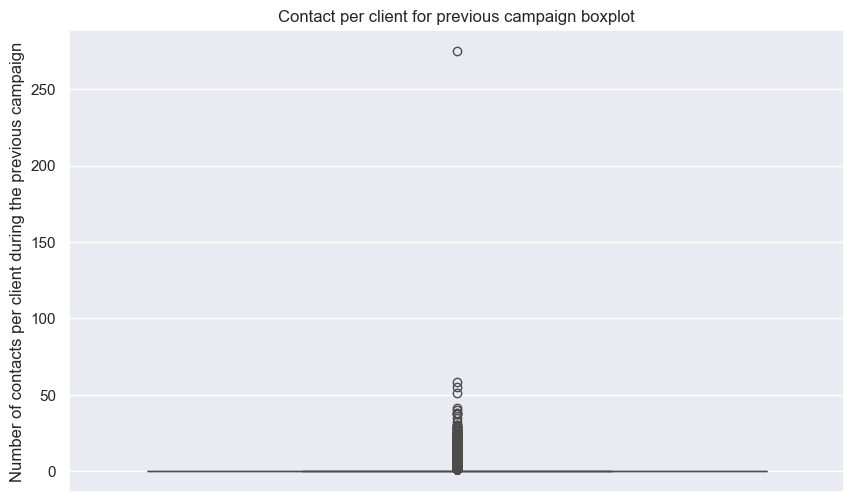

In [94]:
#Boxplot to visualise outliers
plt.figure(figsize = (10, 6))
sns.boxplot(y = "previous", data = a2)
sns.set(font_scale = 1)
plt.ylabel("Number of contacts per client during the previous campaign")
plt.title("Contact per client for previous campaign boxplot")
plt.show()

In [95]:
#Using the function "find_outliers" created earlier
outliers7 = find_outliers_IQR(a2["previous"])
print("number of outliers: "+ str(len(outliers7)))
print("max outlier value: "+ str(outliers7.max()))
print("min outlier value: "+ str(outliers7.min()))

number of outliers: 8256
max outlier value: 275
min outlier value: 1


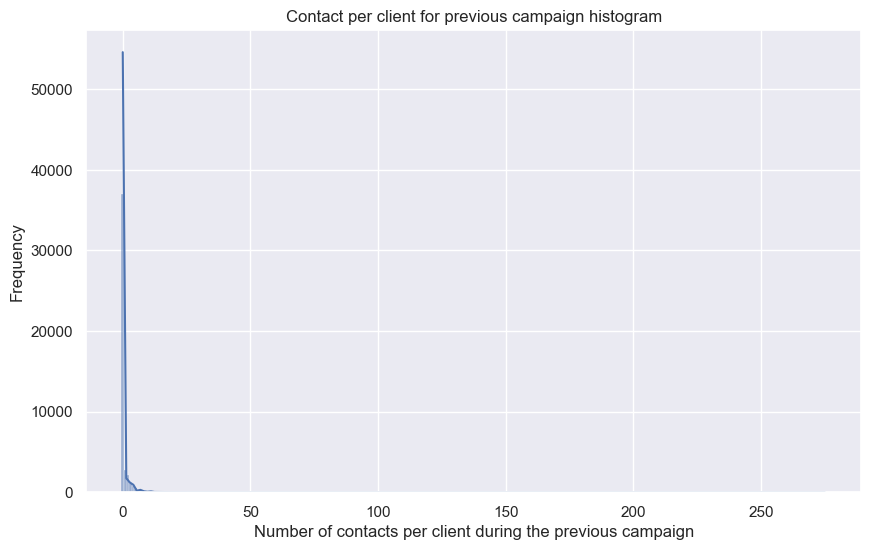

In [99]:
#Plot a histogram of the previous variable
plt.figure(figsize = (10, 6))
sns.histplot(data=a2, x="previous", discrete = True, kde = True)
plt.xlabel("Number of contacts per client during the previous campaign")
plt.ylabel("Frequency")
plt.title("Contact per client for previous campaign histogram")
plt.show()


In [100]:
#Q16. -	What were the outcomes of the previous marketing campaigns?
print(a2["poutcome"].value_counts())

poutcome
unknown    36959
failure     4900
other       1838
success     1513
Name: count, dtype: int64


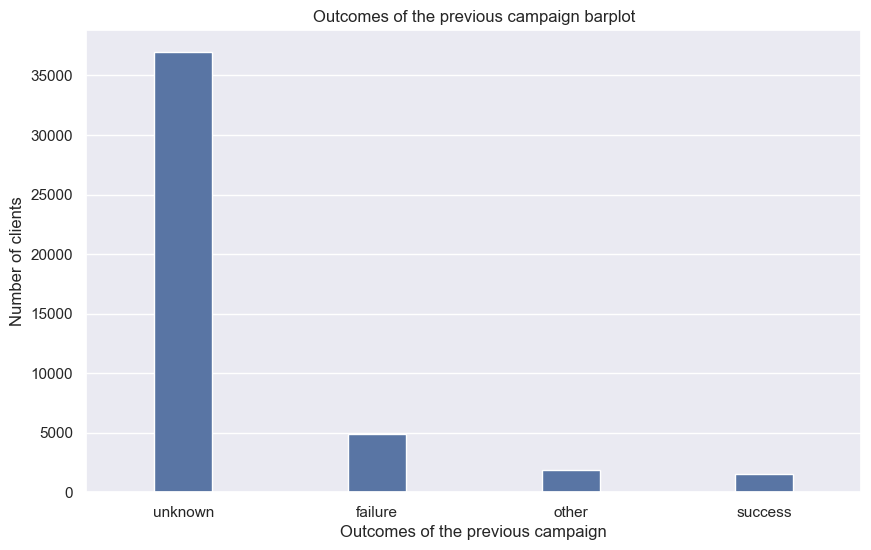

In [101]:
#Making a countplot for outcome of the previous campaign
plt.figure(figsize=(10, 6))
sns.countplot(x = "poutcome", data = a2, width = 0.3)
sns.set(font_scale = 1)
plt.xlabel("Outcomes of the previous campaign")
plt.ylabel("Number of clients")
plt.title("Outcomes of the previous campaign barplot")
plt.show()

In [102]:
#Q17 -	What is the distribution of clients who subscribed to a term deposit vs. those who did not?
print(a2["y_subscription"].value_counts())

y_subscription
no     39917
yes     5293
Name: count, dtype: int64


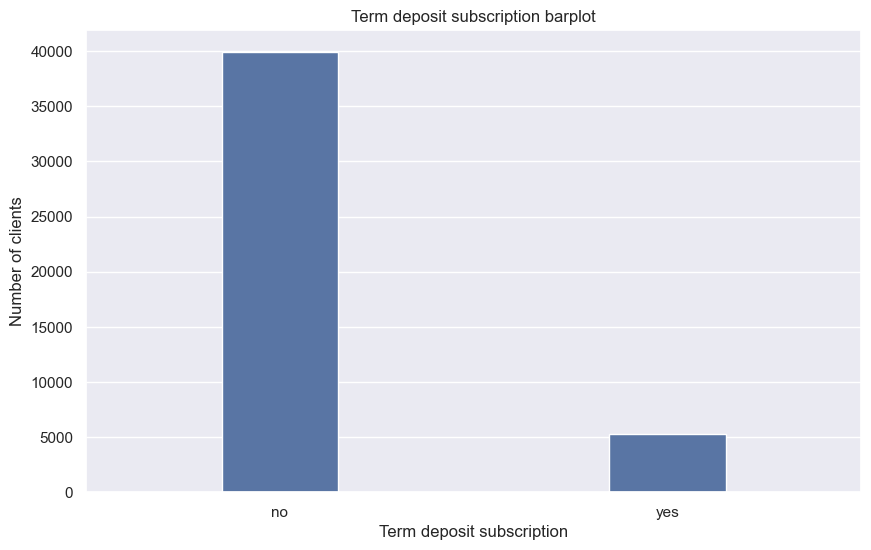

In [103]:
#Making a countplot for term deposit subscription
plt.figure(figsize=(10, 6))
sns.countplot(x = "y_subscription", data = a2, width = 0.3)
sns.set(font_scale = 1)
plt.xlabel("Term deposit subscription")
plt.ylabel("Number of clients")
plt.title("Term deposit subscription barplot")
plt.show()

In [152]:
#Q18 -	Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?
#Convert the yes, no values of binary variables to 1, 0 and other categorical variables to float
a4 = a2.copy(deep = True)
a4["cred_default"] = a4["cred_default"].replace({"yes": 1, "no": 0})
a4["housing"] = a4["housing"].replace({"yes": 1, "no": 0})
a4["loan"] = a4["loan"].replace({"yes": 1, "no": 0})
a4["y_subscription"] = a4["y_subscription"].replace({"yes": 1, "no": 0})
a4["poutcome"] = a4["poutcome"].replace({"failure": 0, "unknown": 1, "other": 2, "success": 3})
a4["job"] = a4["job"].replace({"unknown": 0, "student": 1, "housemaid": 2, "unemployed": 3, "entrepreneur": 4, "self-employed": 5, "retired": 6, "services": 7, "admin.": 8, "technician": 9, "management": 10, "blue-collar": 11})
a4["marital_status"] = a4["marital_status"].replace({"divorced": 0, "single": 1, "married": 2})
a4["education"] = a4["education"].replace({"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3})
a4["month"] = a4["month"].replace({"jan": 0, "feb": 1, "mar": 2, "apr": 3, "may": 4, "jun": 5, "jul": 6, "aug": 7, "sep": 8, "oct": 9, "nov": 10, "dec": 11})
a4["contact"] = a4["contact"].replace({"telephone": 0, "unknown": 1, "cellular": 2})
print(a4.head(5))

   age job marital_status education cred_default  balance housing loan  \
0   58  10              2         3            0     2143       1    0   
1   44   9              1         2            0       29       1    0   
2   33   4              2         2            0        2       1    1   
3   47  11              2         0            0     1506       1    0   
4   33   0              1         0            0        1       0    0   

  contact  day month  duration  campaign  pdays  previous poutcome  \
0       1    5     4       261         1     -1         0        1   
1       1    5     4       151         1     -1         0        1   
2       1    5     4        76         1     -1         0        1   
3       1    5     4        92         1     -1         0        1   
4       1    5     4       198         1     -1         0        1   

  y_subscription  
0              0  
1              0  
2              0  
3              0  
4              0  


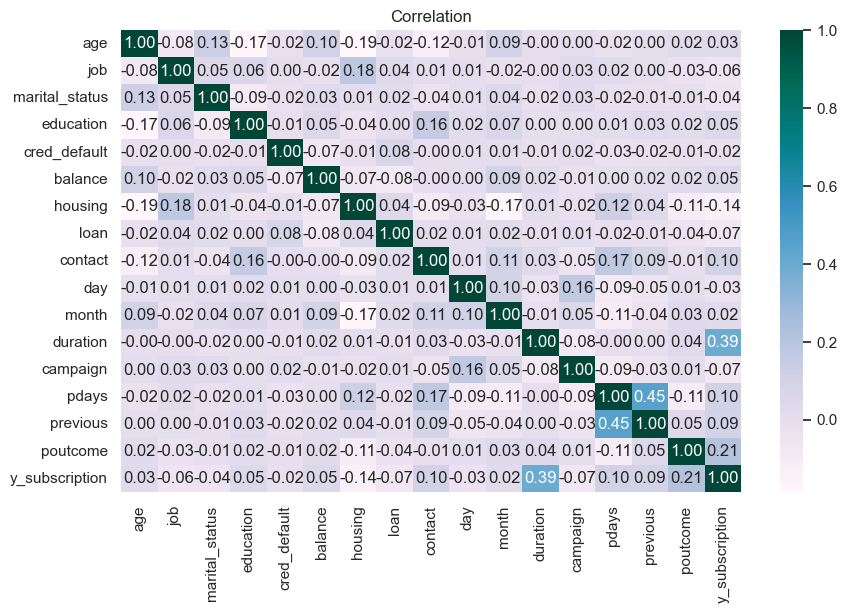

In [143]:
#Making a correlation heatmap
numeric_a4 = a4.select_dtypes(include = ["int64", "float64"])
corr_matrix = numeric_a4.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", fmt = ".2f")
plt.title("Correlation")
plt.show()

In [8]:
#Create a boolean mask to create a dataframe that only has rows where y_subscription == yes
mask1 = a2["y_subscription"] == "yes"
a5 = a2[mask1]

In [10]:
print(a2.shape)
print(a5.shape)

(45210, 17)
(5293, 17)


In [11]:
a5.head(5)

,age,job,marital_status,education,cred_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_subscription
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


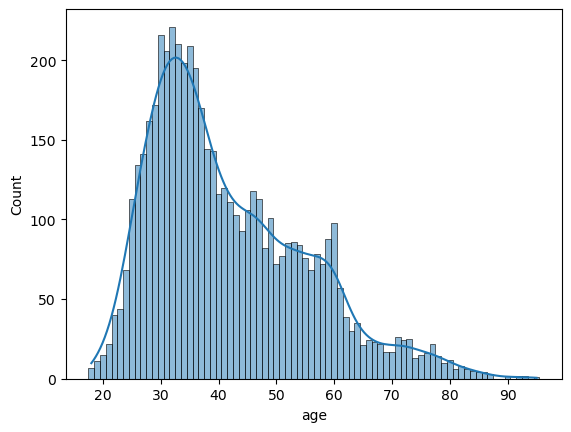

In [12]:
sns.histplot(data = a5, x = "age", discrete = True, kde = True)
plt.show()

In [13]:
a5["job"].value_counts()

job
management       1302
technician        840
blue-collar       708
admin.            631
retired           519
services          369
student           269
unemployed        202
self-employed     187
entrepreneur      123
housemaid         109
unknown            34
Name: count, dtype: int64

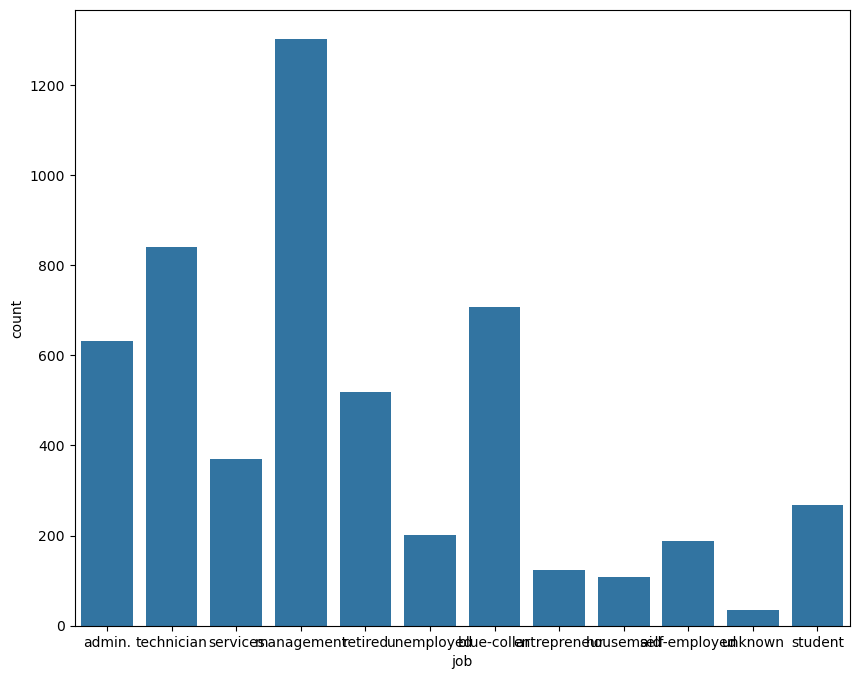

In [15]:
plt.figure(figsize = (10, 8))
sns.countplot(data = a5, x = "job")
plt.show()